# Outperformer - Analyser

In [84]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [61]:
df = pd.DataFrame.from_csv('adj_close.csv')
ndx = pd.DataFrame.from_csv('nasdaq.csv')

In [13]:
normalized = df.div(df.ix[0], axis=1)

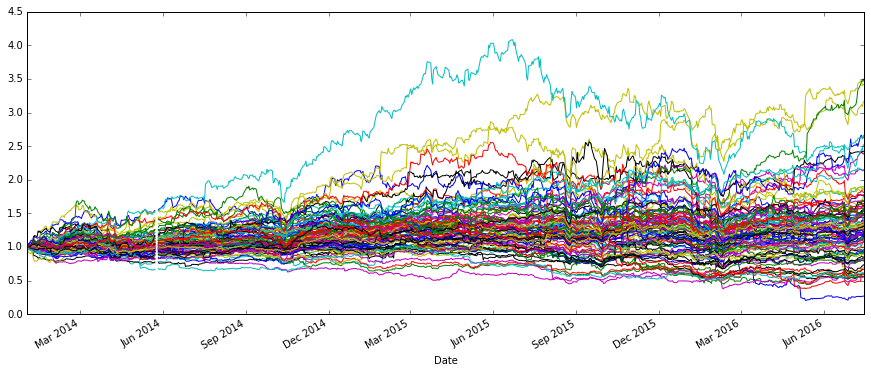

In [85]:
normalized.plot(legend=False)

In [34]:
log_returns = np.log(df.pct_change() + 1)
log_returns = log_returns[1:] # First row is NaN otherwise

In [59]:
# This calculation will take some time...
mean_corr_coeffs = log_returns.rolling(window=10).corr(pairwise=True).mean().mean()

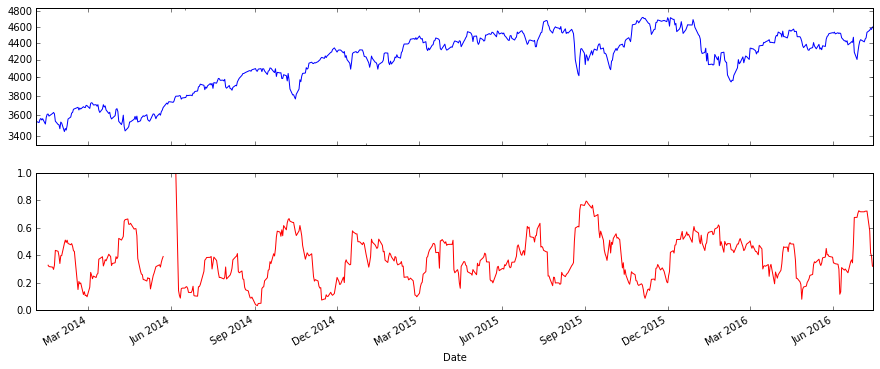

In [129]:
fig, axes = plt.subplots(nrows=2)
# Print nasdaq on logarithmic scale
ndx.plot(ax=axes[0], logy=True, legend=False, yticks=range(3200,5000,200))
axes[0].margins(y=0.1)
axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
mean_corr_coeffs.plot(sharex=axes[0], ylim=(0,1), style='r-')